# Objective

1. Build an NN model for Mnist dataset 
2. Adjust the parameters for better accuracy, such as number of layers, number of nodes in each layer, optimizer, learning rate, etc

# Setup Environment

In [1]:
%env KERAS_BACKEND=tensorflow
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

env: KERAS_BACKEND=tensorflow


# Prepare Data

In [2]:
# load data
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Prepare x
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# Prepare y
import keras.utils as np_utils
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

Using TensorFlow backend.


# Customized Model Parameters
With the default parameters provided by the tutorial

In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

def evaluate_param(hidden_units=500, hidden_layers=2, activation='sigmoid', loss='mse', optimizer='sgd'):
    model = Sequential()

    for i in range(0, hidden_layers):
        model.add(Dense(units=hidden_units, activation=activation, input_dim=784 if i is 0 else None))

    model.add(Dense(units=10, activation='softmax'))
    model.summary()

    model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=100, epochs=20)
    return model.evaluate(x_test, y_test)[1]

# Draw Results with Different Parameters

In [4]:
def draw_results(title, xlable, ylable, x, y):
    plt.title(title,fontsize=24)
    plt.xlabel(xlable,fontsize=14)
    plt.ylabel(ylable,fontsize=14)
    plt.tick_params(axis="both",labelsize=14)
    plt.plot(x, y)
    plt.show()

# Tune Model Parameters
1. With different number of hidden layers
    * Options: 1, 2, 5, 10, 20
    * It's very intersting that the accuracy is actually good when the number of hidden layers is only 1 or 2, while it dropped dramatically after 5. I guess this has something to do with other parameters such as activation function.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 397,510
Trainable params: 397,510
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.0841 - acc: 0.2821
Epoch 2/20
60000/60000 [==============================] - 3s 46us/step - loss: 0.0649 - acc: 0.5385
Epoch 3/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.0509 - acc: 0.6843
Epoch 4/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0420 - acc: 0.7504
Epoch 5/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.0360 - acc: 0.8006
Epoch 6/20
60000/60000 [========

60000/60000 [==============================] - 34s 560us/step - loss: 0.0900 - acc: 0.1124
Epoch 6/20
60000/60000 [==============================] - 33s 551us/step - loss: 0.0900 - acc: 0.1124
Epoch 7/20
60000/60000 [==============================] - 33s 555us/step - loss: 0.0900 - acc: 0.11241s - loss: 0.0
Epoch 8/20
60000/60000 [==============================] - 34s 560us/step - loss: 0.0900 - acc: 0.1124
Epoch 9/20
60000/60000 [==============================] - 33s 553us/step - loss: 0.0900 - acc: 0.1124
Epoch 10/20
60000/60000 [==============================] - 33s 554us/step - loss: 0.0900 - acc: 0.1124
Epoch 11/20
60000/60000 [==============================] - 34s 562us/step - loss: 0.0900 - acc: 0.1124
Epoch 12/20
60000/60000 [==============================] - 33s 555us/step - loss: 0.0900 - acc: 0.1124
Epoch 13/20
60000/60000 [==============================] - 33s 556us/step - loss: 0.0900 - acc: 0.1124
Epoch 14/20
60000/60000 [==============================] - 34s 561us/step -

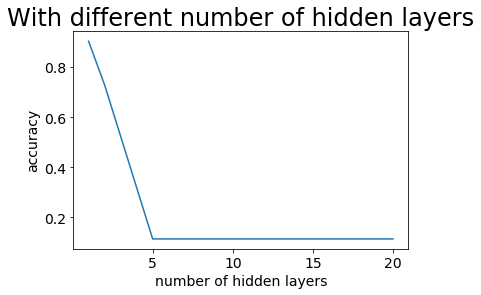

In [5]:
r1 = {}

for hidden_layers in [1, 2, 5, 10, 20]:
    r1[hidden_layers] = evaluate_param(hidden_layers=hidden_layers)
 
draw_results('With different number of hidden layers', 'number of hidden layers', 'accuracy', r1.keys(), r1.values())

2. With different number of nodes in each hidden layer
    * Options: 1, 10, 100, 300, 500, 1000, 2000
    * The result shows that it's more accurate with more nodes in each hidden layer. Even with 2000 nodes in each hidden layer, the accuracy is still under 90 %. The possible reason is that the number of nodes in the input layer is 784. Thus, the number of nodes in each hidden layer has to be as many or more so that the information would not be down-sampled too much.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 1)                 785       
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_49 (Dense)             (None, 10)                20        
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 0.0906 - acc: 0.0991
Epoch 2/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.0906 - acc: 0.0991
Epoch 3/20
60000/60000 [==============================] - 0s 8us/step - loss: 0.0905 - acc: 0.0992
Epoch 4/20
60000/60000 [==============================] - 1s 8us/step - loss: 0.0905 - acc: 0.0991
Epoch 5/20


60000/60000 [==============================] - 12s 200us/step - loss: 0.0454 - acc: 0.7714
Epoch 17/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0433 - acc: 0.7785
Epoch 18/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0414 - acc: 0.7868
Epoch 19/20
60000/60000 [==============================] - 12s 203us/step - loss: 0.0396 - acc: 0.7957
Epoch 20/20
10000/10000 [==============================] - 1s 117us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 2000)              1570000   
_________________________________________________________________
dense_66 (Dense)             (None, 2000)              4002000   
_________________________________________________________________
dense_67 (Dense)             (None, 10)                20010     
Total params: 5,592,010
Trainable params: 5,592,010
Non-trainable

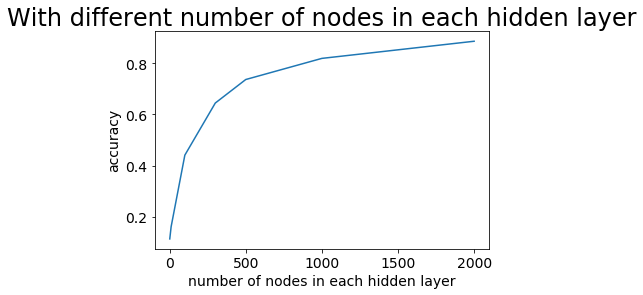

In [7]:
r2 = {}

for hidden_units in [1,10, 100, 300, 500, 1000, 2000]:
    r2[hidden_units] = evaluate_param(hidden_units=hidden_units)
    
draw_results('With different number of nodes in each hidden layer', 'number of nodes in each hidden layer', 'accuracy', r2.keys(), r2.values())

3. With different type of activation function
    * Options: linear, sigmoid, elu, relu

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_69 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_70 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1420 - acc: 0.2882
Epoch 2/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1193 - acc: 0.4022
Epoch 3/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.1130 - acc: 0.4339
Epoch 4/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.1111 - acc: 0.4434


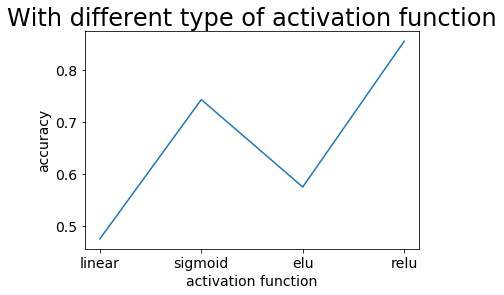

In [9]:
r3 = {}

for activation in ['linear', 'sigmoid', 'elu', 'relu']:
    r3[activation] = evaluate_param(activation=activation)
    
draw_results('With different type of activation function', 'activation function', 'accuracy', r3.keys(), r3.values())

4. With different type of optimizer
    * Options: sgd, rmsprop, adagrad, adam

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_92 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_93 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_94 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0902 - acc: 0.1659
Epoch 2/20
60000/60000 [==============================] - 5s 75us/step - loss: 0.0884 - acc: 0.2539
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0871 - acc: 0.2939
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0856 - acc: 0.3318


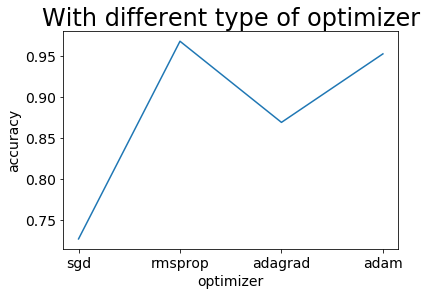

In [12]:
r4 = {}

for optimizer in ['sgd', 'rmsprop', 'adagrad', 'adam']:
    r4[optimizer] = evaluate_param(optimizer=optimizer)
    
draw_results('With different type of optimizer', 'optimizer', 'accuracy', r4.keys(), r4.values())

5. With different type of loss function
    * Options: mean_squared_error, categorical_hinge, logcosh

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 500)               392500    
_________________________________________________________________
dense_84 (Dense)             (None, 500)               250500    
_________________________________________________________________
dense_85 (Dense)             (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0913 - acc: 0.1363
Epoch 2/20
60000/60000 [==============================] - 4s 75us/step - loss: 0.0891 - acc: 0.2104
Epoch 3/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0873 - acc: 0.2583
Epoch 4/20
60000/60000 [==============================] - 5s 76us/step - loss: 0.0856 - acc: 0.2895


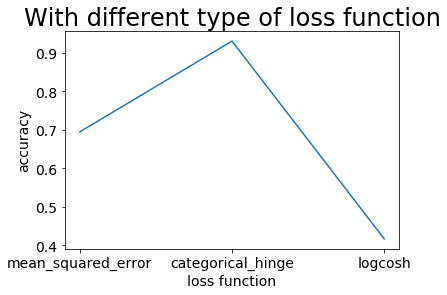

In [11]:
r5 = {}

for loss in ['mean_squared_error', 'categorical_hinge', 'logcosh']:
    r5[loss] = evaluate_param(loss=loss)
    
draw_results('With different type of loss function', 'loss function', 'accuracy', r5.keys(), r5.values())

# Best Model?

According to the results of the five previous experiments, build a model with the parameters with best accuracy.

* Number of hidden layers: 1
* Number of nodes in each hidden layer: 2000
* Activation function: relu
* Optimizer: rmsprop
* Loss function: categorical_hinge

However, using these parameters altogether gets poor performance. The paramters affect one another.


In [14]:
accuracy = evaluate_param(hidden_units=2000, hidden_layers=1, activation='relu', optimizer='rmsprop', loss='categorical_hinge')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1506 (Dense)           (None, 2000)              1570000   
_________________________________________________________________
dense_1507 (Dense)           (None, 10)                20010     
Total params: 1,590,010
Trainable params: 1,590,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
60000/60000 [==============================] - 25s 418us/step - loss: 1.7030 - acc: 0.1485
Epoch 2/20
60000/60000 [==============================] - 15s 251us/step - loss: 1.6128 - acc: 0.1936
Epoch 3/20
60000/60000 [==============================] - 15s 245us/step - loss: 1.6086 - acc: 0.1957
Epoch 4/20
60000/60000 [==============================] - 15s 246us/step - loss: 1.5946 - acc: 0.2027
Epoch 5/20
60000/60000 [==============================] - 15s 244us/step - loss: 1.5919 - acc: 0.2040
Epoch 6/20
60000/6